<a href="https://colab.research.google.com/github/Mansipatel21/DLP/blob/main/Comparing_LearningRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with learning rate 0.01...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7046 - loss: 1.1354 - val_accuracy: 0.8982 - val_loss: 0.3822
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8981 - loss: 0.3790 - val_accuracy: 0.9148 - val_loss: 0.3107
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9119 - loss: 0.3162 - val_accuracy: 0.9227 - val_loss: 0.2782
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9175 - loss: 0.2900 - val_accuracy: 0.9278 - val_loss: 0.2564
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9232 - loss: 0.2709 - val_accuracy: 0.9327 - val_loss: 0.2400
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9298 - loss: 0.2472 - val_accuracy: 0.9378 - val_loss: 0.2253
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.2287 - val_accuracy: 0.9405 - val_loss: 0.2144
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9416 - loss: 0.2082 - 

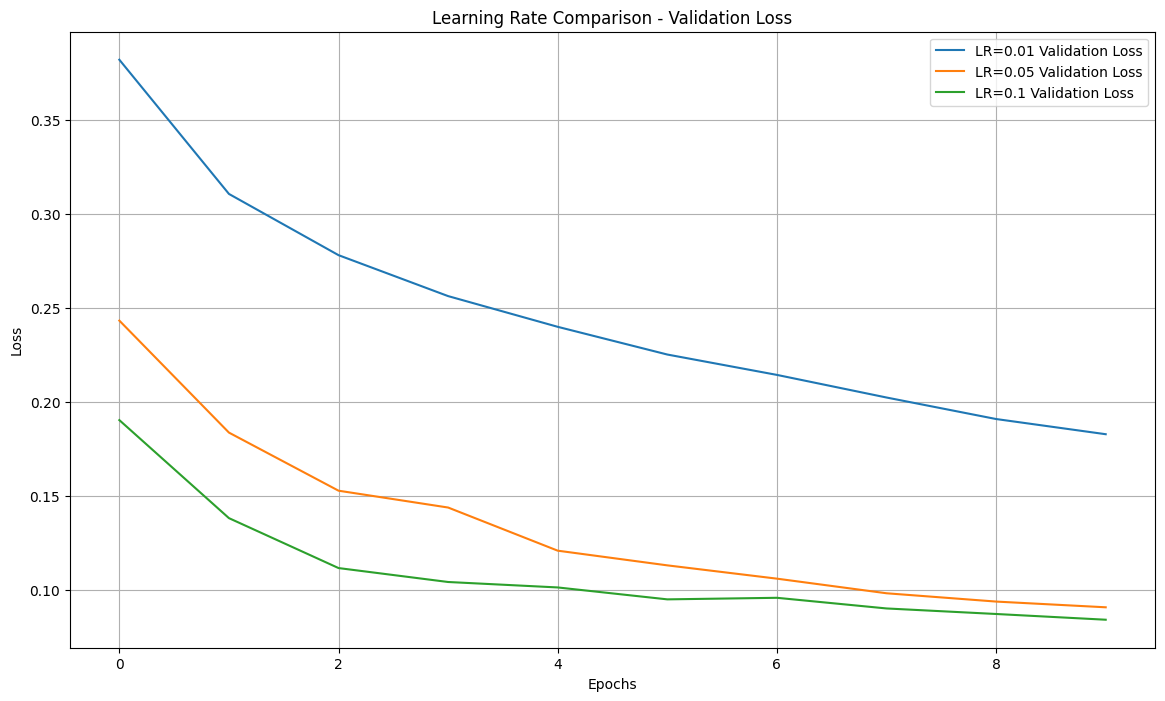

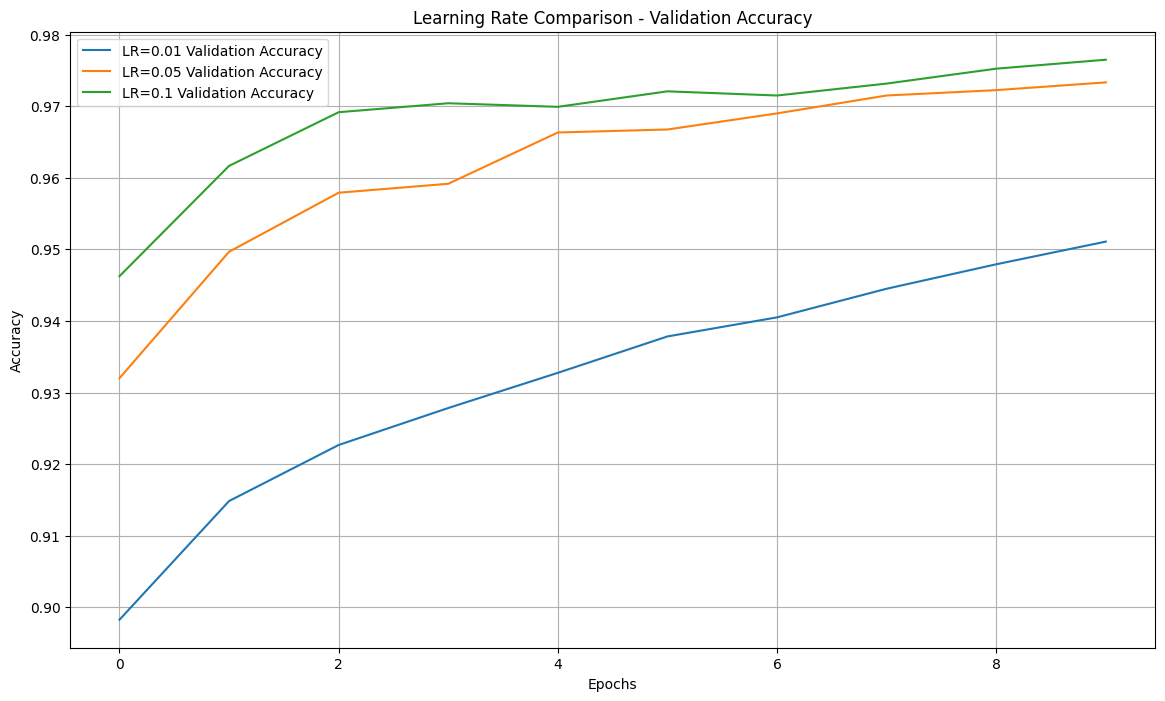

In [1]:
#Optimization: Comparing Learning Rates
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple feedforward neural network
def create_model(learning_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List of learning rates to compare
learning_rates = [0.01, 0.05, 0.1]

# Train and evaluate the model with each learning rate
history_dict = {}
for lr in learning_rates:
    print(f"Training with learning rate {lr}...")
    model = create_model(lr)
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
    history_dict[lr] = history

# Plot training loss and validation loss for each learning rate
plt.figure(figsize=(14, 8))
for lr, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'LR={lr} Validation Loss')
plt.title('Learning Rate Comparison - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 8))
for lr, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f'LR={lr} Validation Accuracy')
plt.title('Learning Rate Comparison - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
